In [ ]:
%pip install pandas numpy matplotlib seaborn scipy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import platform
from scipy.stats import chi2_contingency

In [2]:
mpl.rcParams['axes.unicode_minus'] = False

current_os = platform.system()
if current_os == 'Windows':
    plt.rcParams["font.family"] = 'Malgun Gothic'
elif current_os == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'
else:
    plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# 데이터 로드
data = pd.read_csv('../../data/school_health_preprocessed.csv')

## 성별에 따라 평균 BMI 지수가 다르므로, 특정 성별이 특정 수면시간대에 몰려있는 경우로 인한 해석의 왜곡이 있는지 확인이 필요함
## 학교급에 따라 하루수면량에 차이가 있는지 확인이 필요함
df = data[['하루수면량', 'BMI', '성별', '학교급']]

# 데이터 확인
print("데이터 샘플:")
print(df.head())

print("\n데이터 정보:")
print(df.info())

print("\n결측치 확인:")
print(df.isnull().sum())

# 결측치 제거
df = df.dropna(subset=['하루수면량', 'BMI', '성별', '학교급'])

# 하루수면량 매핑
sleep_time_mapping = {
    1.0: '6시간 이내',
    2.0: '6~7시간',
    3.0: '7~8시간',
    4.0: '8시간 이상'
}
df['수면시간대'] = df['하루수면량'].map(sleep_time_mapping)

df['수면시간_수치'] = df['하루수면량'].map({
    1.0: 5.5,   # 6시간 이내 평균 가정
    2.0: 6.5,   # 6~7시간 평균 가정
    3.0: 7.5,   # 7~8시간 평균 가정
    4.0: 8.5    # 8시간 이상 평균 가정
})

groups = df.groupby(['성별', '학교급'])


데이터 샘플:
   하루수면량        BMI 성별 학교급
0    4.0  15.667728  여   초
1    3.0  15.644444  여   초
2    4.0  15.159148  여   초
3    4.0  22.701628  여   초
4    2.0  14.870556  여   초

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84871 entries, 0 to 84870
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   하루수면량   82494 non-null  float64
 1   BMI     84871 non-null  float64
 2   성별      84871 non-null  object 
 3   학교급     84871 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.6+ MB
None

결측치 확인:
하루수면량    2377
BMI         0
성별          0
학교급         0
dtype: int64


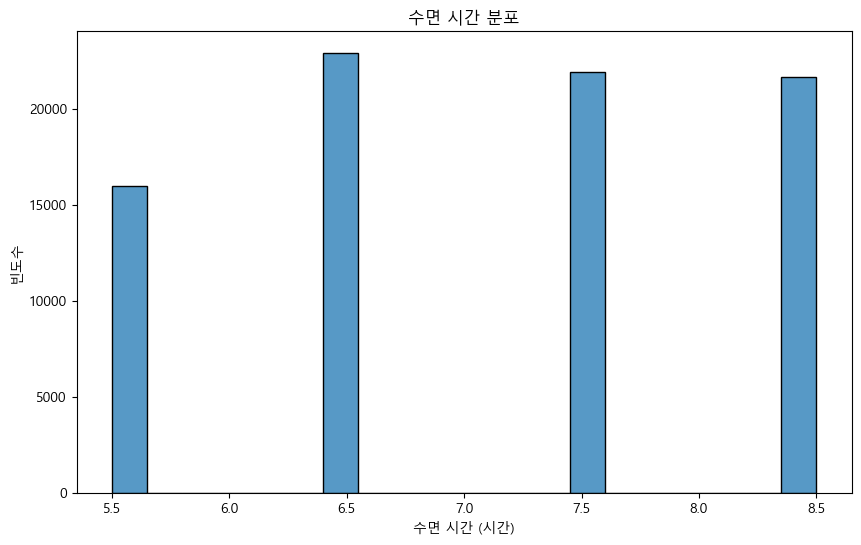

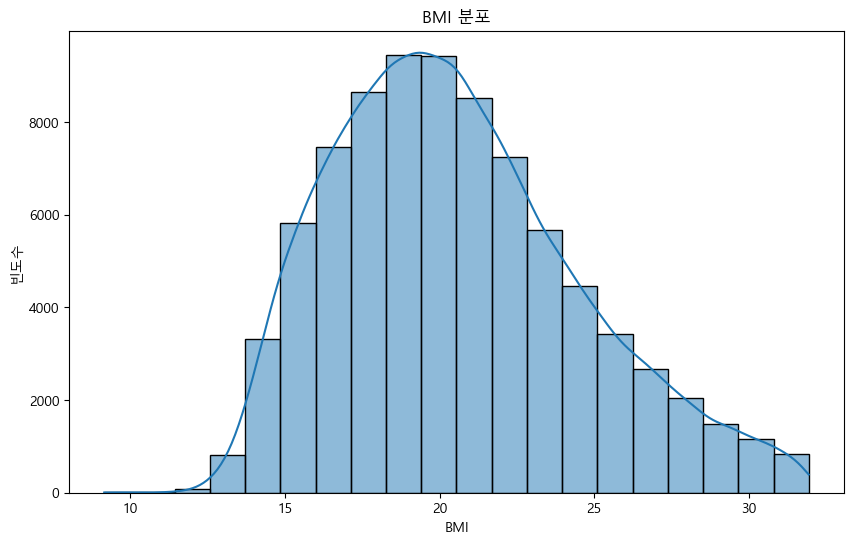

In [4]:
# 수면 시간 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['수면시간_수치'], bins=20)
plt.title('수면 시간 분포')
plt.xlabel('수면 시간 (시간)')
plt.ylabel('빈도수')
plt.show()

# BMI 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI 분포')
plt.xlabel('BMI')
plt.ylabel('빈도수')
plt.show()


성별 분포:
성별
남    41783
여    40711
Name: count, dtype: int64

수면시간대별 성별 분포:
수면시간대   성별
6~7시간   남     11576
        여     11320
6시간 이내  여      9275
        남      6707
7~8시간   남     12010
        여      9924
8시간 이상  남     11490
        여     10192
Name: count, dtype: int64


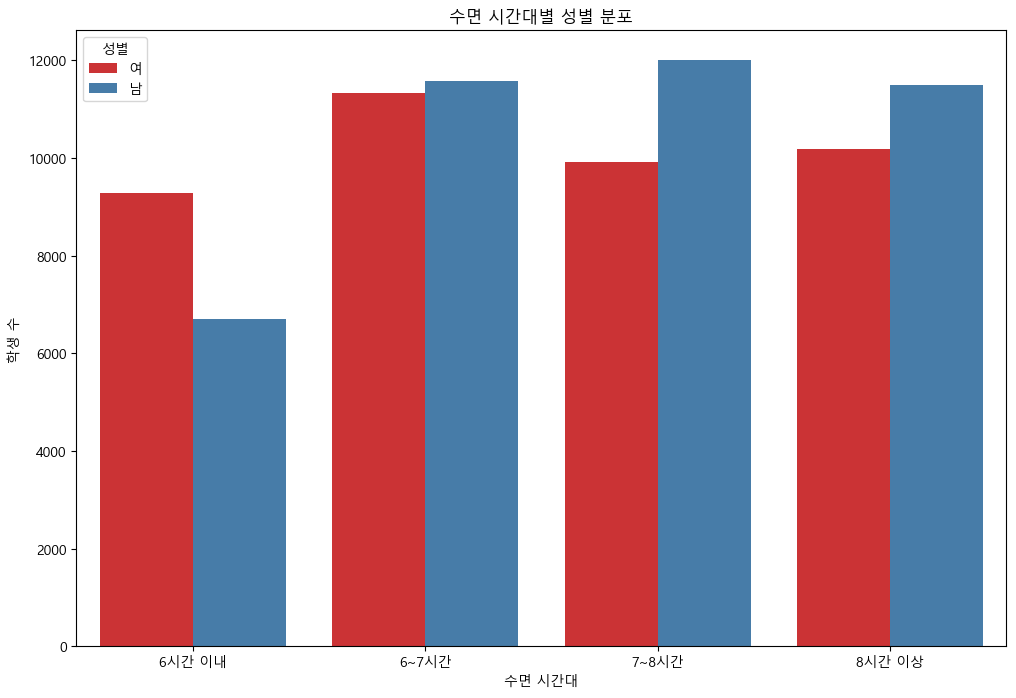


수면시간대와 성별의 교차표:
성별          남      여
수면시간대               
6~7시간   11576  11320
6시간 이내   6707   9275
7~8시간   12010   9924
8시간 이상  11490  10192

카이제곱 통계량: 677.7656
p-value: 1.3905892979191714e-146
자유도: 3


In [5]:
# 성별과 수면시간대의 연관성 검정
print("\n성별 분포:")
print(df['성별'].value_counts())

print("\n수면시간대별 성별 분포:")
sleep_gender_counts = df.groupby('수면시간대')['성별'].value_counts()
print(sleep_gender_counts)

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='수면시간대', hue='성별', palette='Set1', order=['6시간 이내', '6~7시간', '7~8시간', '8시간 이상'])
plt.title('수면 시간대별 성별 분포')
plt.xlabel('수면 시간대')
plt.ylabel('학생 수')
plt.legend(title='성별')
plt.show()

contingency_table_gender = pd.crosstab(df['수면시간대'], df['성별'])
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)

print("\n수면시간대와 성별의 교차표:")
print(contingency_table_gender)
print(f"\n카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p}")
print(f"자유도: {dof}")

## 결과: p-value가 0.05 미만으로, 수면시간대별로 성별이 유의미하게 다르게 분포하고 있음을 확인


학교급 분포:
학교급
초    32717
고    26822
중    22955
Name: count, dtype: int64

수면시간대별 학교급 분포:
수면시간대   학교급
6~7시간   고      11023
        중       9048
        초       2825
6시간 이내  고      11830
        중       3404
        초        748
7~8시간   초      11227
        중       7668
        고       3039
8시간 이상  초      17917
        중       2835
        고        930
Name: count, dtype: int64


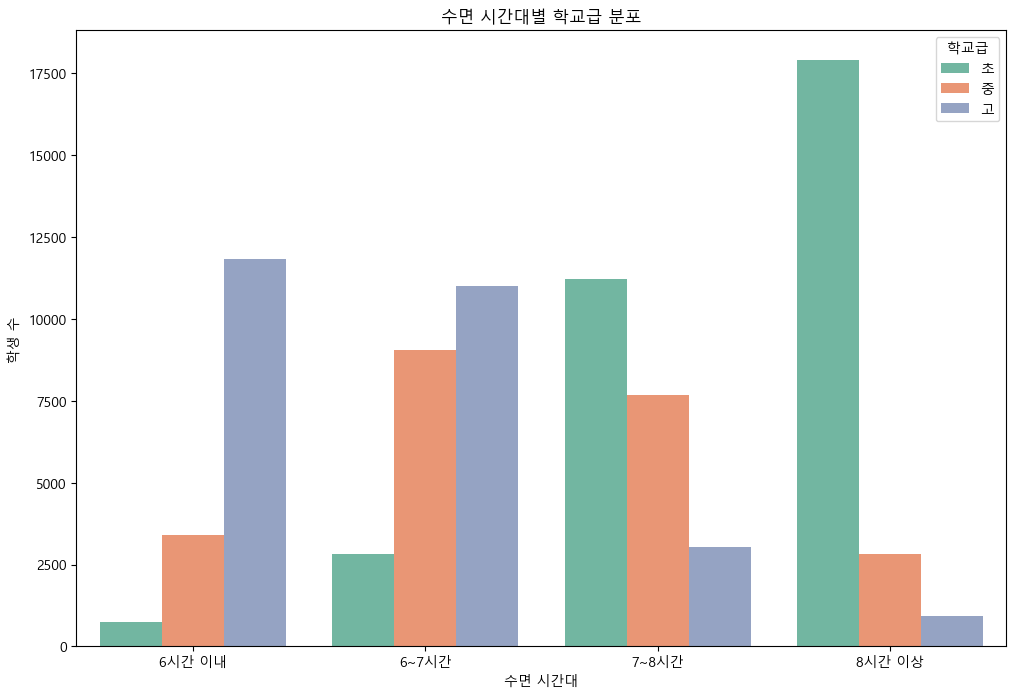


수면시간대와 학교급의 교차표:
학교급         고     중      초
수면시간대                     
6~7시간   11023  9048   2825
6시간 이내  11830  3404    748
7~8시간    3039  7668  11227
8시간 이상    930  2835  17917

카이제곱 통계량: 41387.3488
p-value: 0.0
자유도: 6


In [6]:
# 학교급과 수면시간대의 연관성 검정
print("\n학교급 분포:")
print(df['학교급'].value_counts())

print("\n수면시간대별 학교급 분포:")
sleep_school_counts = df.groupby('수면시간대')['학교급'].value_counts()
print(sleep_school_counts)

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='수면시간대', hue='학교급', palette='Set2', order=['6시간 이내', '6~7시간', '7~8시간', '8시간 이상'])
plt.title('수면 시간대별 학교급 분포')
plt.xlabel('수면 시간대')
plt.ylabel('학생 수')
plt.legend(title='학교급')
plt.show()

contingency_table_school = pd.crosstab(df['수면시간대'], df['학교급'])
chi2_s, p_s, dof_s, expected_s = chi2_contingency(contingency_table_school)

print("\n수면시간대와 학교급의 교차표:")
print(contingency_table_school)
print(f"\n카이제곱 통계량: {chi2_s:.4f}")
print(f"p-value: {p_s}")
print(f"자유도: {dof_s}")

## 결과: p-value가 0.05 미만으로, 수면시간대별로 학교급이 유의미하게 다르게 분포하고 있음을 확인

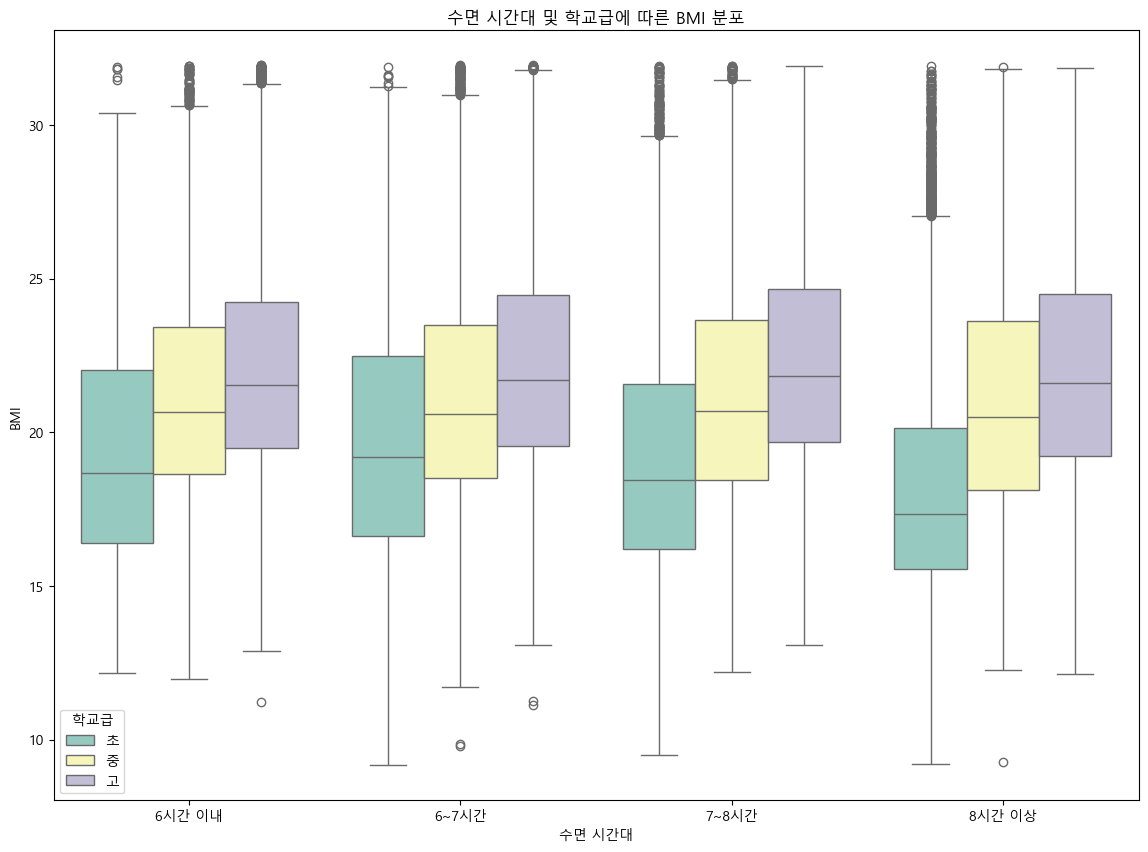

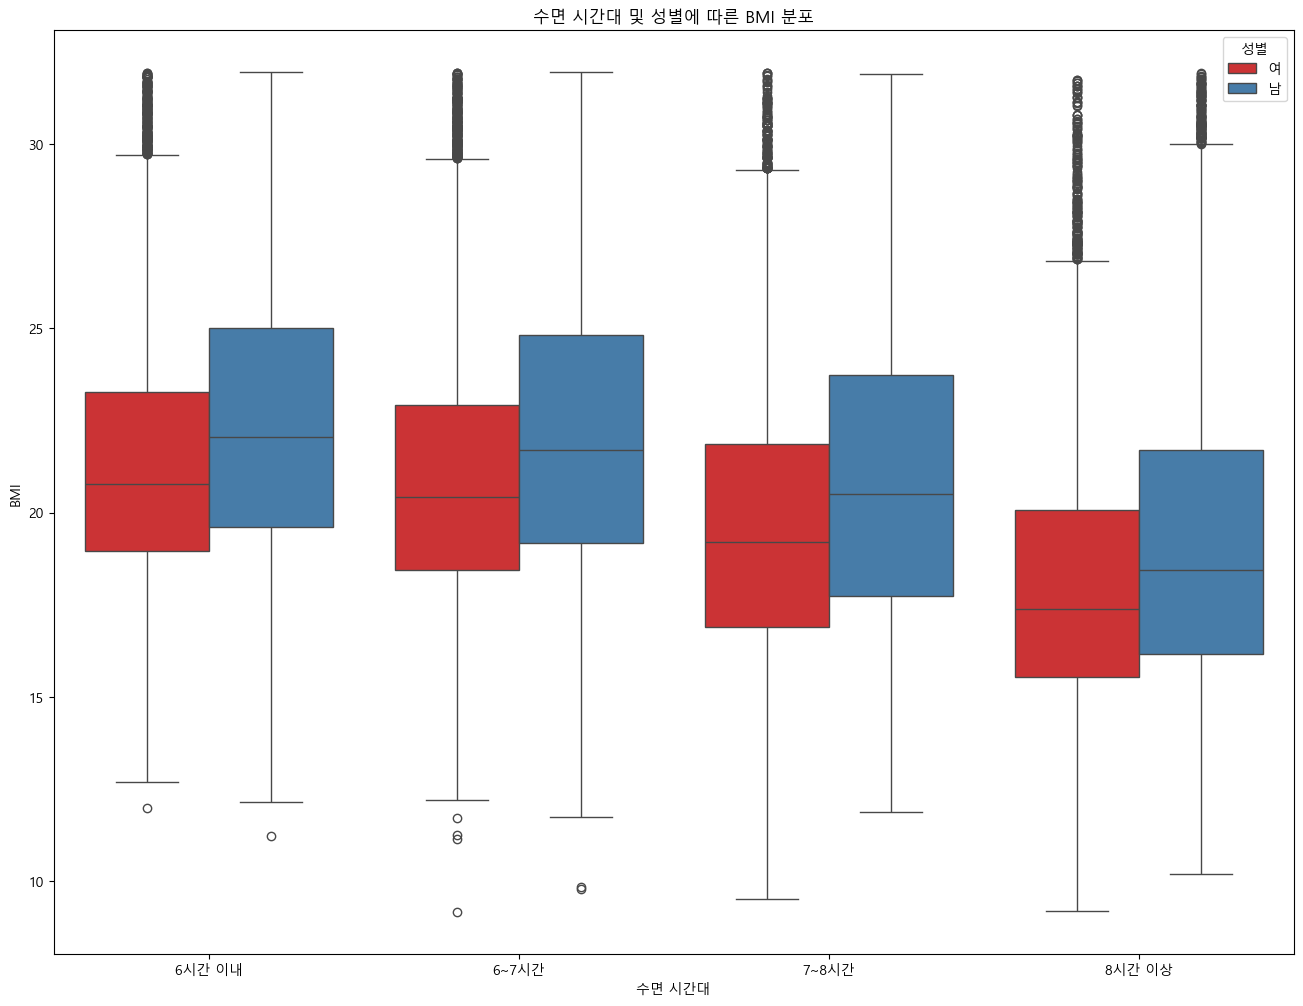

In [7]:
# 학교급과 성별을 기준으로 한 수면시간대별 BMI 분포 시각화
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, x='수면시간대', y='BMI', hue='학교급', palette='Set3', order=['6시간 이내', '6~7시간', '7~8시간', '8시간 이상'])
plt.title('수면 시간대 및 학교급에 따른 BMI 분포')
plt.xlabel('수면 시간대')
plt.ylabel('BMI')
plt.legend(title='학교급')
plt.show()

plt.figure(figsize=(16, 12))
sns.boxplot(data=df, x='수면시간대', y='BMI', hue='성별', palette='Set1', order=['6시간 이내', '6~7시간', '7~8시간', '8시간 이상'])
plt.title('수면 시간대 및 성별에 따른 BMI 분포')
plt.xlabel('수면 시간대')
plt.ylabel('BMI')
plt.legend(title='성별')
plt.show()

c:\Users\hooni\anaconda3\envs\sda2024\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hooni\anaconda3\envs\sda2024\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


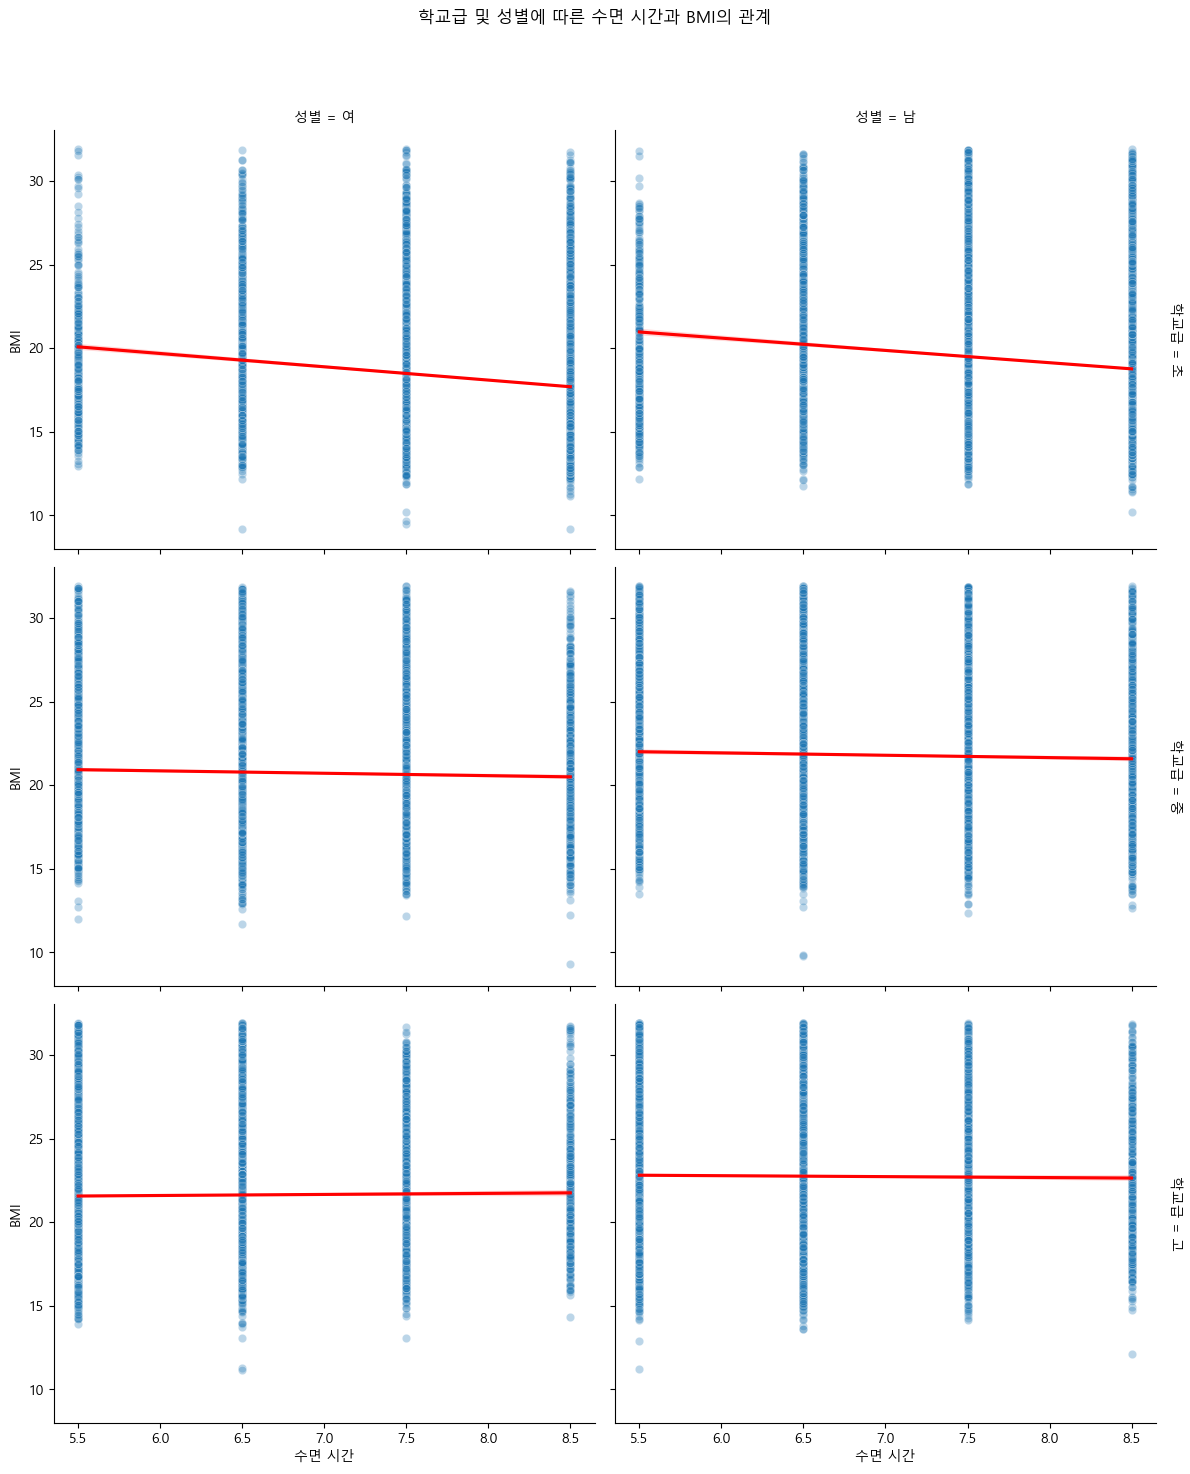

In [8]:
# FacetGrid를 사용하여 학교급과 성별에 따른 수면 시간과 BMI의 관계 시각화
## FacetGrid : 학교급, 성별의 여러 범주를 시각화하기 적합하고, 산점도와 회귀선을 동시에 그릴 수 있어 여러 그룹의 차이를 비교하기 용이함
g = sns.FacetGrid(df, row='학교급', col='성별', margin_titles=True, height=5, aspect=1.2)
g.map(sns.scatterplot, '수면시간_수치', 'BMI', alpha=0.3)
g.map(sns.regplot, '수면시간_수치', 'BMI', scatter=False, color='red')
g.set_axis_labels('수면 시간', 'BMI')
plt.subplots_adjust(top=0.9)
g.figure.suptitle('학교급 및 성별에 따른 수면 시간과 BMI의 관계')
plt.show()

In [9]:
# 학교급과 성별별 수면시간과 BMI의 상관관계 계산
print("\n학교급 및 성별별 수면 시간과 BMI의 상관계수:")

for school_level in df['학교급'].unique():
    for gender in df['성별'].unique():
        subset = df[(df['학교급'] == school_level) & (df['성별'] == gender)]
        corr = subset['수면시간_수치'].corr(subset['BMI'])
        print(f"{school_level}, {gender} 학생의 상관계수: {corr:.4f}")

## 결과: 초등학생의 경우 약한 음의 상관관계를 갖지만, 중고등학생의 경우 상관관계가 거의 없음


학교급 및 성별별 수면 시간과 BMI의 상관계수:
초, 여 학생의 상관계수: -0.1738
초, 남 학생의 상관계수: -0.1409
중, 여 학생의 상관계수: -0.0370
중, 남 학생의 상관계수: -0.0308
고, 여 학생의 상관계수: 0.0144
고, 남 학생의 상관계수: -0.0122
